In [1]:
!nvidia-smi

Mon Aug 14 11:24:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
import torchvision
from torchvision import datasets
from torchvision import transforms


In [4]:
## MNIST Train datasets
train_data = datasets.MNIST(root=".",train=True, download=True,transform=transforms.ToTensor())

## MNIST Test datasets

test_data = datasets.MNIST(root=".", train=False, download=True, transform = transforms.ToTensor())



100%|██████████| 9912422/9912422 [00:00<00:00, 114556361.71it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39912913.95it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 33511771.93it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8041590.87it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
train_data , test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
img = train_data[0][0]
label = train_data[0][1]

print(f"Image:\n {img}")
print(f"Label:\n {label}")


Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
## [height, width, color_channel] -> Tensorflow
img.shape ## [color_channel, height, width] -> pytorch

torch.Size([1, 28, 28])

In [9]:
class_names = train_data.classes
class_names, len(class_names)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 10)

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


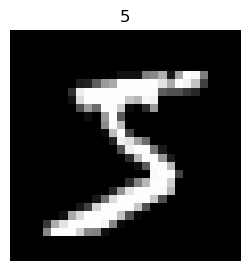

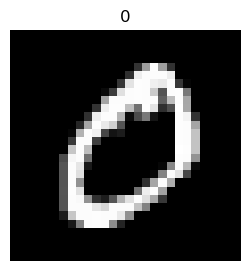

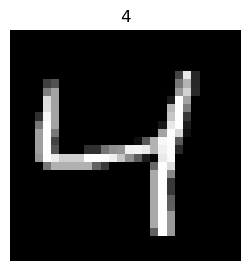

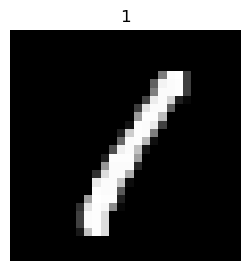

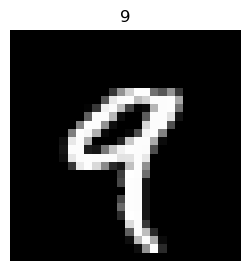

In [10]:
## Time for visualization
import matplotlib.pyplot as plt
for i in range(5):
    img = train_data[i][0]
    print(img.shape)
    img_squeeze = img.squeeze()
    print(img_squeeze.shape)
    label = train_data[i][1]
    plt.figure(figsize=(3,3))
    plt.imshow(img_squeeze, cmap="gray")
    plt.title(label)
    plt.axis(False)
    

In [11]:
## Loading into a dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size= 32, shuffle=False)


In [12]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ddab8c0be50>,
 <torch.utils.data.dataloader.DataLoader at 0x7ddab8c08fd0>)

In [13]:
for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [15]:
## Lets create a TinyVGG Model
from torch import nn
class MNIST_model(torch.nn.Module):
    
    def __init__(self, inn:int,hu:int,outs:int):
        super().__init__()
        self.block_1=nn.Sequential(
        nn.Conv2d(in_channels=inn, out_channels=hu, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hu, out_channels=hu, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
        
        self.block_2=nn.Sequential(
        nn.Conv2d(in_channels=hu, out_channels=hu, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hu, out_channels=hu, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
        
        
        self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hu*7*7, out_features=outs))
        
    def forward(self,x):
#         print(f"Shape of input_{x.shape}")
        x = self.block_1(x)
#         print(f"shape of input after block_1 {x.shape}")
        x = self.block_2(x)
#         print(f"shape of input after block_2 {x.shape}")
        x = self.classifier(x)
#         print(f"output shape {x.shape}")
        return x
    
        
        

In [16]:
model = MNIST_model(inn=1,hu=10, outs = 10).to(device)
model

MNIST_model(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [17]:
## lets create a dummy input
dummy_x = torch.rand(size=(1,28,28)).unsqueeze(dim=0).to(device)
model(dummy_x)

tensor([[ 0.0182, -0.0044, -0.0306, -0.0045,  0.0089,  0.0150,  0.0375,  0.0478,
         -0.0383,  0.0047]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [18]:

dummy_x_2 = torch.rand(size=([1,10, 7,7]))
print(dummy_x_2.shape)
flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 10, 7, 7])


torch.Size([1, 490])

In [19]:
%%time 
from tqdm.auto import tqdm

## train on CPU
model_cpu = MNIST_model(inn = 1, hu= 10, outs=10).to("cpu")
## loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

## training loop
epochs = 5

for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model_cpu.train()
        
        ## putting data in CPU
        X,y = X.to("cpu"), y.to("cpu")
        
        ## forward pass
        y_pred = model_cpu(X)
        ## calc loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        ## set optimizer to Zero
        optimizer.zero_grad()
        ## backprop
        loss.backward()
        ## update the optimizer
        optimizer.step()
    ## adjust the train loss for number of batches
    train_loss /= len(train_dataloader)
    ## test loop
    test_loss_total = 0
    ## put the model in eval mode
    model_cpu.eval()
    
    ## turning on inference mode
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            ## to put data on CPU
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
            
            ## output the input
            test_pred = model_cpu(X_test)
            ## loss
            test_loss = loss_fn(test_pred , y_test)
            ## accumulation of test losses
            test_loss_total += test_loss
        ## adjusting the loss for batches
        test_loss_total /= len(test_dataloader)
    print(f"Epoch: {epoch} || Loss: {train_loss} || test_loss: {test_loss}")
            
    

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 || Loss: 0.255598783493042 || test_loss: 0.00017430304433219135
Epoch: 1 || Loss: 0.07064081728458405 || test_loss: 0.000465718301711604
Epoch: 2 || Loss: 0.054111048579216 || test_loss: 0.0003856792172882706
Epoch: 3 || Loss: 0.04486507177352905 || test_loss: 0.0004571773752104491
Epoch: 4 || Loss: 0.038958363234996796 || test_loss: 0.00031698739621788263
CPU times: user 2min 36s, sys: 785 ms, total: 2min 37s
Wall time: 2min 38s


In [20]:
%%time 
from tqdm.auto import tqdm
# device = "cuda" if torch.cus
model_gpu = MNIST_model(inn=1,hu=10, outs=10).to(device)

## create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)


## training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    ## training mode
    model_gpu.train()
    for batch, (X,y) in enumerate(train_dataloader):
        ## put the data in GPU
        X,y = X.to(device), y.to(device)
        ## forward pass
        y_pred = model_gpu(X)
        ## loss calc
        loss = loss_fn(y_pred, y)
        train_loss += loss
        ## set optimizer to zero grad
        optimizer.step()
        ## backprop 
        loss.backward()
        ## update the optimizer
        optimizer.step()
    ## adjust the train loss to number the batches
    train_loss /= len(train_dataloader)
    ## testing loop
    
    test_loss_total = 0
    ## eval mode
    model_gpu.eval()
    ## inference mode
    with torch.inference_mode():
        for batch, (X,y) in enumerate(test_dataloader):
            ## putting the data in gpu
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            ## output
            test_pred = model_gpu(X_test)
            ## loss
            test_loss = loss_fn(test_pred, y_test)
            ## loss in toto
            test_loss_total += test_loss
        ## adjust test loss
        test_loss_total /= len(test_dataloader)
    ## print the stats
    print(f"Epochs: {epoch} || loss: {train_loss} || Test_loss: {test_loss}")
            

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0 || loss: 30.403608322143555 || Test_loss: 108.57325744628906
Epochs: 1 || loss: 128.46035766601562 || Test_loss: 148.49034118652344
Epochs: 2 || loss: 240.14456176757812 || Test_loss: 277.4240417480469
Epochs: 3 || loss: 349.72857666015625 || Test_loss: 401.815185546875
Epochs: 4 || loss: 436.32073974609375 || Test_loss: 629.1852416992188
CPU times: user 56.6 s, sys: 504 ms, total: 57.1 s
Wall time: 58.4 s


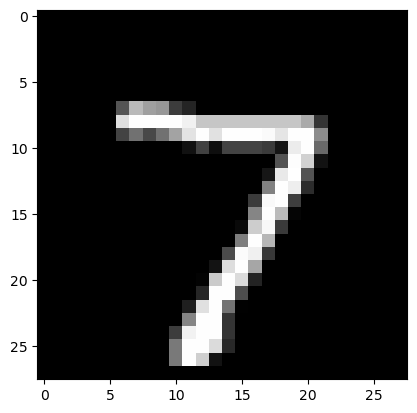

In [21]:
## time for prediction
plt.imshow(test_data[0][0].squeeze(), cmap="gray")


In [22]:

# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

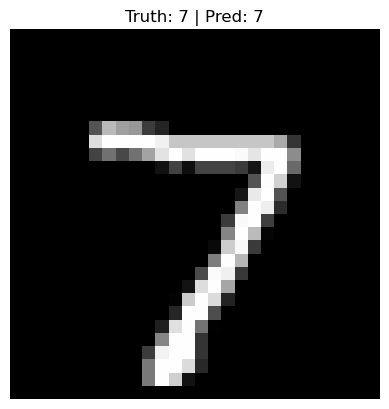

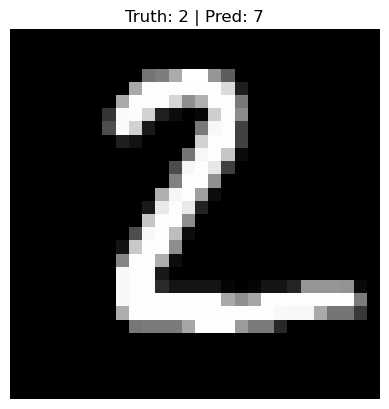

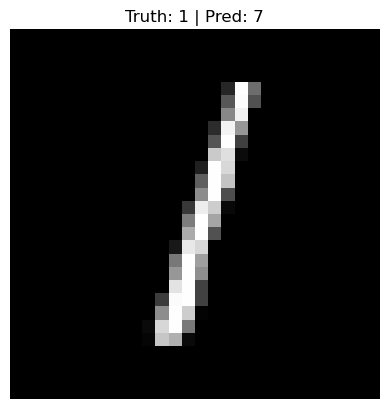

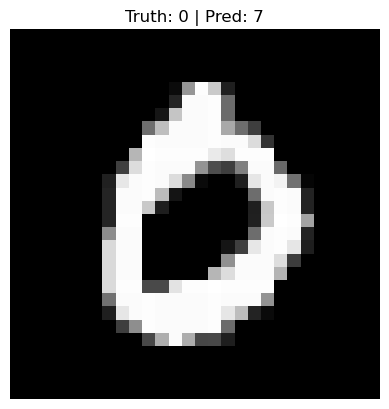

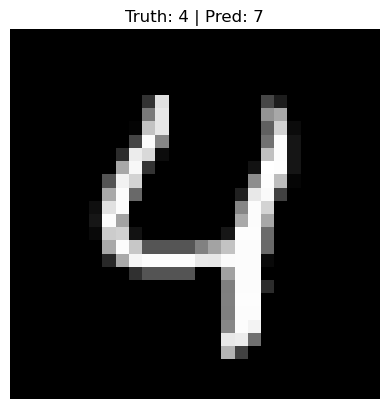

In [23]:

num_to_plot = 5 
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}") 
  plt.axis(False);

In [24]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

mlxtend version: 0.22.0


In [25]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher
     

0.22.0


In [26]:

# Make predictions across all test data
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_gpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [27]:
test_data.targets[:10], y_preds[:10]


(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7]))

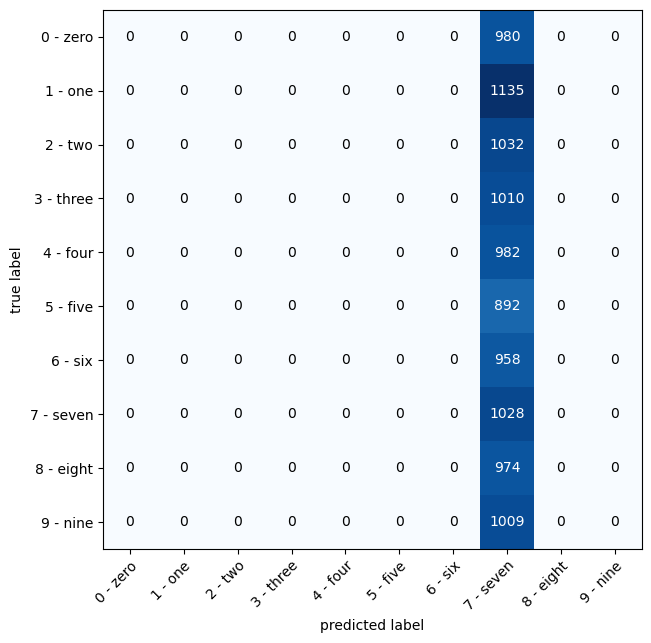

In [28]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)